In [1]:

import numpy as np
import naima
import astropy.units as u
from astropy.io import ascii
from naima.models import Synchrotron, InverseCompton, Bremsstrahlung, BrokenPowerLaw
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
#using dummy amplitudes for the electrons here, will set total proton energy later.
#define electron spectrum as power law (PL).
#note: use *positive* indices for PL spectra in naima. 

electrons = BrokenPowerLaw( amplitude = 1/u.eV, e_0 = 1 * u.TeV, 
alpha_1 = 2.1, alpha_2 = 3.1, e_break = 50 *u.TeV)

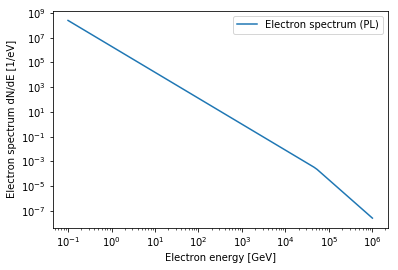

In [3]:
%matplotlib inline

#plot electron spectrum (just to see what it looks like)

#energies at which we want to evaluate the spectrum
Eelec = np.logspace(-1, 6, 100) * u.GeV

#get_ipython().magic(u'matplotlib inline')

plt.loglog(Eelec, electrons(Eelec), label="Electron spectrum (PL)")
plt.ylabel("Electron spectrum dN/dE [1/eV]")
plt.xlabel("Electron energy [GeV]")
plt.legend()


In [4]:
#to illustrate the use of units and how to access the spectra.
#naima models are phyical and accept/return astropy quantities.
#Try: electrons( 2.0 ) without a unit...
for E in [ 1*u.GeV, 1000*u.GeV, 1*u.TeV]:
    print "dN/dE(", E, ") = ", electrons(E)


dN/dE( 1.0 GeV ) =  1995262.31497 1 / eV
dN/dE( 1000.0 GeV ) =  1.0 1 / eV
dN/dE( 1.0 TeV ) =  1.0 1 / eV


In [5]:
#now, to get the total emission from those electrons.
#naima supports three emission modes: Synchrotron, Bremsstrahlung, Inverse Compton

synch = Synchrotron(electrons, B=3*u.uG,
                   Eemin = 1*u.GeV, Eemax = 510*u.TeV, nEed = 100)

IC = InverseCompton(electrons, seed_photon_fields=["CMB", "NIR", "FIR"],
                   Eemin = 1*u.GeV, Eemax = 510*u.TeV, nEed = 300)

brems = Bremsstrahlung(electrons, n0=1.0/u.cm**3,
                   Eemin = 1*u.GeV, Eemax = 510*u.TeV, nEed = 100)

#set normalization by fixing the total electron energy. For some reason, this is done 
#via the emission spectrum.
synch.set_We(10**50 * u.erg)

#units check...
print "Flux dN/dE:", synch.flux([1]*u.keV, distance=2*u.kpc)
print "SED E^2dN/dE:", synch.sed([1]*u.keV, distance=2*u.kpc)


Flux dN/dE: [ 0.00335333] 1 / (cm2 eV s)
SED E^2dN/dE: [  5.37262908e-09] erg / (cm2 s)


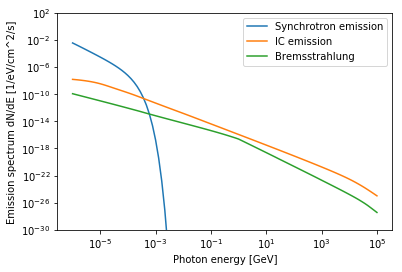

In [6]:
#gamma-ray flux dN/dE

#energies at which we want to evaluate the spectrum
Egamma = np.logspace(-6, 5, 100) * u.GeV

#source distance
D=2*u.kpc

%matplotlib inline

plt.clf()
plt.loglog(Egamma, synch.flux(Egamma, distance=D), label="Synchrotron emission")
plt.loglog(Egamma, IC.flux(Egamma, distance=D), label="IC emission")
plt.loglog(Egamma, brems.flux(Egamma, distance=D), label="Bremsstrahlung")
plt.ylabel("Emission spectrum dN/dE [1/eV/cm^2/s]")
plt.xlabel("Photon energy [GeV]")
plt.ylim(1e-30,1e2)
plt.legend()


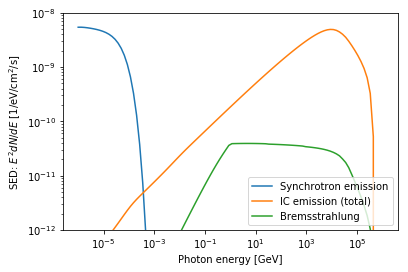

In [7]:
#gamma-ray SED E^2 dN/dE

#energies at which we want to evaluate the spectrum
Egamma = np.logspace(-6, 6, 100) * u.GeV

#source distance
D=2*u.kpc

%matplotlib inline
plt.clf()
plt.loglog(Egamma, synch.sed(Egamma, distance=D), label="Synchrotron emission")
plt.loglog(Egamma, IC.sed(Egamma, distance=D), label="IC emission (total)")
plt.loglog(Egamma, brems.sed(Egamma, distance=D), label="Bremsstrahlung")
plt.ylabel(r"SED: $E^2 dN/dE$ [1/eV/cm$^2$/s]")
plt.xlabel("Photon energy [GeV]")
plt.ylim(1e-12,1e-8)
plt.legend()